# Setting

## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [2]:
raw_data = pd.read_csv('datasets/1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Preprocessing

In [5]:
raw_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [6]:
data = raw_data.drop(['Brand', 'Body', 'Engine Type', 'Registration', 'Model'], axis = 1)
data.describe(include = 'all')

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [7]:
data.isnull().sum()

Price      172
Mileage      0
EngineV    150
Year         0
dtype: int64

In [8]:
data_no_mv = data.dropna(axis = 0)

In [9]:
data_no_mv.describe(include = 'all')

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


### Probability Distribution Fuction (PDF)

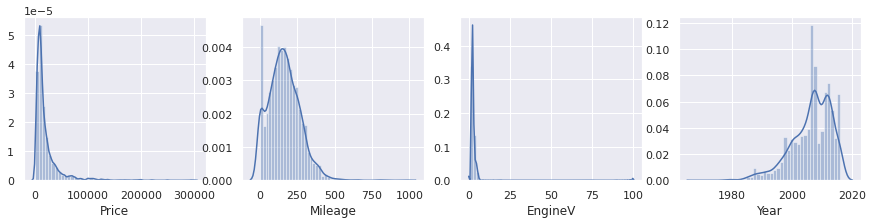

In [88]:
fig, axes = plt.subplots(1, 4, figsize = (15, 3))
sns.distplot(data_no_mv['Price'], ax = axes[0])
sns.distplot(data_no_mv['Mileage'], ax = axes[1])
sns.distplot(data_no_mv['EngineV'], ax = axes[2])
sns.distplot(data_no_mv['Year'], ax = axes[3])

### Dealing with outliers

In [65]:
data_1 = data_no_mv[data_no_mv['EngineV'] < 6.5]

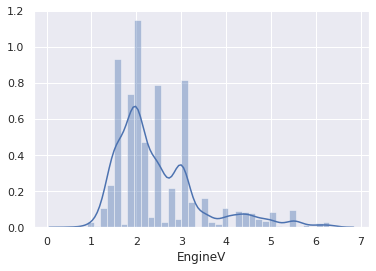

In [66]:
sns.distplot(data_1['EngineV'])

#### The Z score Method

In [71]:
data_1.shape

(4002, 4)

In [72]:
from scipy import stats
z = np.abs(stats.zscore(data_1))
print(z)

[[0.59593698 1.09812058 0.47944664 2.2994398 ]
 [0.45289706 2.54790028 0.4450866  1.10456113]
 [0.24413611 1.88100162 2.60233083 0.50712179]
 ...
 [0.50702027 1.56947408 1.06144209 1.10456113]
 [0.44903112 0.29590914 0.47944664 3.1955988 ]
 [0.23640423 0.38065472 0.47944664 0.98647654]]


In [73]:
threshold = 3
print(np.where(z > 3))

(array([   5,    5,   38,   56,   96,  118,  128,  160,  175,  193,  201,
        209,  216,  239,  248,  264,  266,  320,  320,  321,  326,  333,
        363,  385,  405,  405,  412,  465,  466,  509,  549,  555,  555,
        584,  619,  639,  666,  676,  694,  742,  749,  768,  783,  810,
        825,  826,  831,  833,  880,  892,  902,  917,  946,  977,  995,
        996, 1023, 1026, 1041, 1075, 1110, 1152, 1181, 1204, 1241, 1257,
       1281, 1292, 1295, 1317, 1322, 1341, 1431, 1463, 1484, 1496, 1514,
       1514, 1516, 1527, 1536, 1542, 1588, 1588, 1595, 1608, 1661, 1674,
       1676, 1690, 1695, 1701, 1702, 1708, 1719, 1729, 1739, 1755, 1755,
       1780, 1815, 1831, 1845, 1847, 1847, 1861, 1869, 1873, 1900, 1906,
       1950, 1954, 1958, 1958, 1980, 2007, 2007, 2028, 2031, 2043, 2043,
       2053, 2060, 2060, 2100, 2101, 2131, 2138, 2194, 2195, 2214, 2246,
       2264, 2270, 2283, 2285, 2300, 2316, 2340, 2356, 2363, 2372, 2391,
       2424, 2438, 2454, 2485, 2500, 2512, 2520, 2

In [74]:
data_zs_method = data_1[(z < 3).all(axis = 1)]
print(data_zs_method)

        Price  Mileage  EngineV  Year
0      4200.0      277      2.0  1991
1      7900.0      427      2.9  1999
2     13300.0      358      5.0  2003
3     23000.0      240      4.2  2007
4     18300.0      120      2.0  2011
...       ...      ...      ...   ...
4337   6800.0      152      1.6  2007
4338  11500.0      163      2.5  2008
4339  17900.0       35      1.6  2014
4341   6500.0        1      3.5  1999
4344  13500.0      124      2.0  2013

[3767 rows x 4 columns]


In [75]:
data_zs_method.describe()

,Price,Mileage,EngineV,Year
count,3767.000000,3767.000000,3767.000000,3767.000000
mean,16236.382190,165.695248,2.365089,2006.397929
std,15099.950965,96.881059,0.820119,6.267037
min,800.000000,0.000000,0.600000,1987.000000
25%,6999.000000,97.000000,1.800000,2003.000000
50%,11100.000000,160.000000,2.000000,2007.000000
75%,19999.000000,230.000000,3.000000,2011.000000
max,95000.000000,472.000000,5.200000,2016.000000


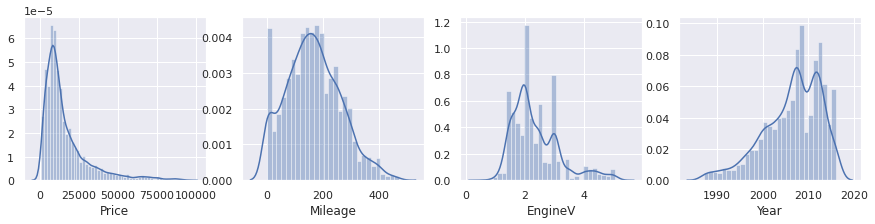

In [85]:
fig, axes = plt.subplots(1, 4, figsize = (15, 3))
sns.distplot(data_zs_method['Price'], ax = axes[0])
sns.distplot(data_zs_method['Mileage'], ax = axes[1])
sns.distplot(data_zs_method['EngineV'], ax = axes[2])
sns.distplot(data_zs_method['Year'], ax = axes[3])

In [90]:
data_cleaned = data_zs_method.reset_index(drop = True)

In [92]:
data_cleaned.describe()

,Price,Mileage,EngineV,Year
count,3767.000000,3767.000000,3767.000000,3767.000000
mean,16236.382190,165.695248,2.365089,2006.397929
std,15099.950965,96.881059,0.820119,6.267037
min,800.000000,0.000000,0.600000,1987.000000
25%,6999.000000,97.000000,1.800000,2003.000000
50%,11100.000000,160.000000,2.000000,2007.000000
75%,19999.000000,230.000000,3.000000,2011.000000
max,95000.000000,472.000000,5.200000,2016.000000


## Checking the OLS assumptions

### Multicollinearity

In [93]:
data_cleaned.columns.values

array(['Price', 'Mileage', 'EngineV', 'Year'], dtype=object)

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'EngineV', 'Year']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Featrues"] = variables.columns

In [99]:
vif

,VIF,Featrues
0,3.920885,Mileage
1,9.366266,EngineV
2,11.495315,Year


In [100]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis = 1)

In [101]:
data_no_multicollinearity.describe()

,Price,Mileage,EngineV
count,3767.000000,3767.000000,3767.000000
mean,16236.382190,165.695248,2.365089
std,15099.950965,96.881059,0.820119
min,800.000000,0.000000,0.600000
25%,6999.000000,97.000000,1.800000
50%,11100.000000,160.000000,2.000000
75%,19999.000000,230.000000,3.000000
max,95000.000000,472.000000,5.200000


# Linear regression model

In [102]:
targets = data_no_multicollinearity['Price']
inputs = data_no_multicollinearity.drop(['Price'], axis = 1)

### Scale the data

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [104]:
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [105]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state = 365)

### Create a regression

In [106]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [107]:
y_hat = reg.predict(x_train)

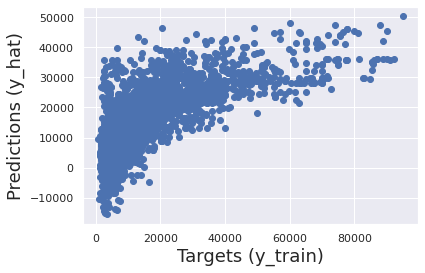

In [108]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size = 18)
plt.ylabel('Predictions (y_hat)', size = 18)
plt.show()

Text(0.5, 1.0, 'Residual PDF')

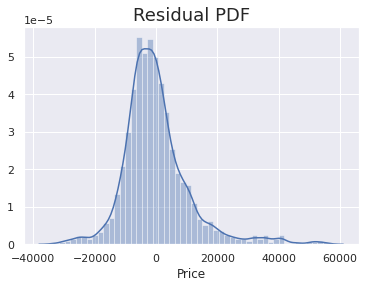

In [110]:
sns.distplot(y_train - y_hat)
plt.title("Residual PDF", size = 18)

In [111]:
reg.score(x_train, y_train)

0.4715460978347392

In [112]:
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1 - (1 - r2)*(n - 1)/(n - p -1)
    return adjusted_r2

In [116]:
adj_r2(x_train, y_train)

0.471194965673832

### Finding the weights and bias

In [118]:
reg.intercept_

16239.662986813197

In [119]:
reg.coef_

array([-8713.32454027,  6311.81409113])

In [120]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-8713.324540
1,EngineV,6311.814091


# Testing

In [122]:
y_hat_test = reg.predict(x_test)

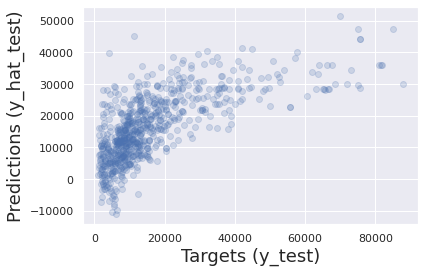

In [123]:
plt.scatter(y_test, y_hat_test, alpha = 0.2)
plt.xlabel('Targets (y_test)', size = 18)
plt.ylabel('Predictions (y_hat_test)', size = 18)
plt.show()

In [126]:
df_pf = pd.DataFrame(y_hat_test, columns = ['prediction'])
df_pf.head()

,prediction
0,15143.347581
1,4626.772492
2,-6027.193124
3,23438.020356
4,1348.732346
